<a href="https://colab.research.google.com/github/ClaudioAresu/R_Datasciencebasics/blob/main/01neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Refression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in nour case, we're going to simplify it:predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [93]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


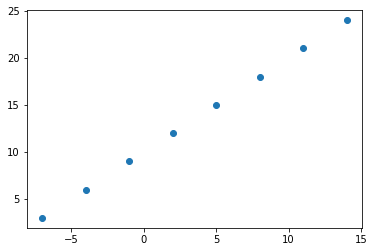

In [94]:
#Select data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

#Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

#visualize
plt.scatter(X,Y)


In [95]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [96]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [97]:
X.shape, Y.shape

((8,), (8,))

In [98]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [99]:
X[0].ndim

0

In [100]:
X[0], Y[0]

(-7.0, 3.0)

In [101]:
#Turn NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)

X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

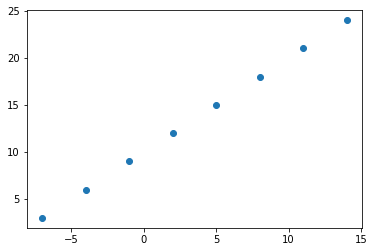

In [102]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

1.Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizers(tells our model to improve the patterns it is learning), and evaluation metrics( what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & Y ( features and labels).

In [103]:
#Create a model (specified to your problem)
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #or just use the string for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 352ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


REMEMBER .CAST TO CHANGE DTYPE

In [104]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 59ms/step


array([[12.716021]], dtype=float32)

In [105]:
y_pred + 11

array([[23.71602]], dtype=float32)

Improve the model

we can improve our mode, by altering the steps we took to create a model.

**Creating a model** - here we might add more layers, increase the number of hidden units(all called neuros)
within each of the hidden layers, change the activation function of each layer.
**Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
**Fitting a model** - Here we can add number of times that the model looks through the date(number of epochs)

In [106]:
#Final Model

model = tf.keras.Sequential([
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), #or just use the string for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)



Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 509ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 14.0250 - mae: 14.0250
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

In [107]:
#Create a model (specified to your problem)
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #or just use the string for stochastic gradient descent
              metrics=["mae"])

#Fit
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0

In [108]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [109]:
model.predict([17.])

1/1 [==============================] - 0s 61ms/step


array([[30.158512]], dtype=float32)

In [110]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 382ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 21ms/step -

In [111]:
model.predict([17.])

1/1 [==============================] - 0s 58ms/step


array([[26.206875]], dtype=float32)

❗REMEMBER OVERFITTING. Try to generalize the data so the ML model can perform well on samples it has never seen before
 ATTENTION with activators(like ReLU)
optimizers(sgd, Adam,...) as well as their learning rates

build -> fit -> evaluate

In [112]:
#Evaluate the model

model.evaluate(X,Y)

1/1 [==============================] - 0s 148ms/step - loss: 0.4215 - mae: 0.4215


[0.42148202657699585, 0.42148202657699585]

In [113]:
X = tf.range(-100,100, 4)

X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [114]:
Y = X+10

Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

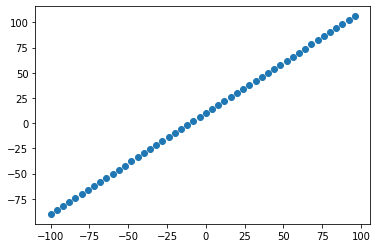

In [115]:
plt.scatter(X,Y)

*Training set - the model learns from this data, which is typically 70-80% of the total data you have available
*Validation set - the model gets tuned on this data, this set is typically 10-15% of the tottal data available.
*Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the tottal data available.

In [116]:
#Check the lenght of how man y samples we have
len(X)

50

In [117]:
#Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

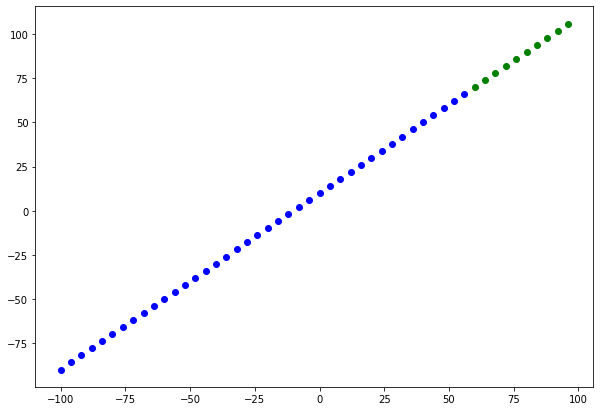

In [118]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Test data")

In [119]:
#Let's have a look at how to create a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 50.2151 - mae: 50.2151
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 46.7280 - mae: 46.7280
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 43.0384 - mae: 43.0384
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 39.5314 - mae: 39.5314
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 36.0511 - mae: 36.0511
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 32.8175 - mae: 32.8175
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 29.7634 - mae: 29.7634
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6108 - mae: 26.6108
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 23.2421 - mae: 23.2421
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 20.4705 - mae: 20.4705
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [120]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [121]:
#Visualize the number of inputs to set the input_shape parameter

X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [122]:
#Create a model which builds automatically by defining the input_shape argument 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,input_shape=[1],name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100, verbose=0)

In [123]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 10)                20        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


Total x Trainable parameters: the total amount and the patterns the model can update as it trains, respectively

In [124]:
model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5091 - mae: 8.5091
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8939 - mae: 8.8939
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3203 - mae: 9.3203
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5259 - mae: 7.5259
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1586 - mae: 8.1586
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6715 - mae: 7.6715
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2772 - mae: 7.2772
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1914 - mae: 8.1914
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 12.3952 - mae: 12.3952
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1346 - mae: 10.1346
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4

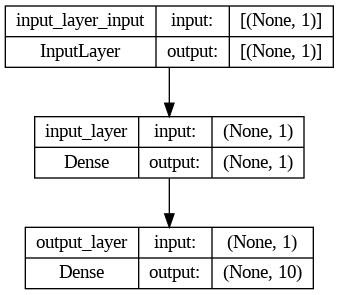

In [125]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [126]:
#Make predictions

Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 47ms/step


array([[50.505444, 50.08534 , 50.53623 , 50.108124, 50.48912 , 50.399338,
        50.097492, 50.47752 , 50.47107 , 50.433815],
       [53.79244 , 53.345276, 53.825855, 53.368965, 53.77529 , 53.680252,
        53.35802 , 53.763454, 53.756912, 53.716072],
       [57.07943 , 56.605217, 57.11548 , 56.62981 , 57.061466, 56.961166,
        56.618546, 57.04939 , 57.04275 , 56.99833 ],
       [60.366425, 59.865158, 60.405106, 59.89065 , 60.34764 , 60.24208 ,
        59.879074, 60.335323, 60.32859 , 60.280586],
       [63.65342 , 63.1251  , 63.69473 , 63.151493, 63.633816, 63.52299 ,
        63.139603, 63.621258, 63.614433, 63.562843],
       [66.940414, 66.38504 , 66.98436 , 66.41234 , 66.91999 , 66.80391 ,
        66.40013 , 66.907196, 66.90027 , 66.8451  ],
       [70.22741 , 69.64498 , 70.27399 , 69.67319 , 70.20617 , 70.084816,
        69.66066 , 70.19313 , 70.18611 , 70.12736 ],
       [73.514404, 72.90492 , 73.56361 , 72.93403 , 73.49234 , 73.36573 ,
        72.92118 , 73.479065, 73.4719

In [127]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [130]:
# Create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  


NameError: ignored

<Figure size 720x504 with 0 Axes>